# [**Universidades Japonesas**](https://www.kaggle.com/datasets/webdevbadger/japanese-universities)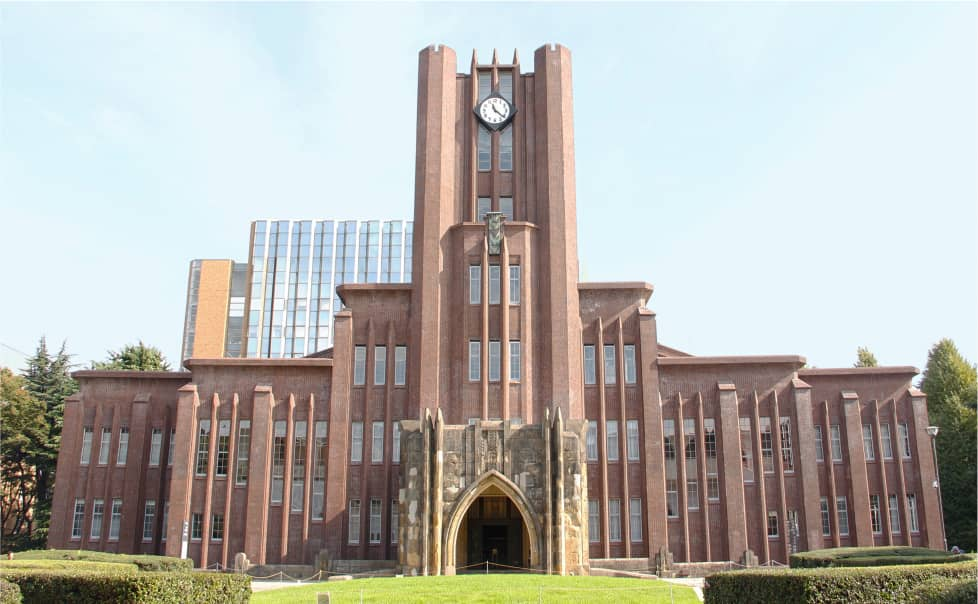

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [87]:
url = 'https://raw.githubusercontent.com/Junhit902/Python/26c8cf04c801d79c62f9bbfa8294f34ed2060000/Data%20Science/datasets/japanese_universities_tratado%20(2).csv'
df= pd.read_csv(url)
df.head()


,Unnamed: 0,name,type,state,found,faculty_count,department_count,has_grad,has_remote,review_rating,review_count,difficulty_SD,difficulty_rank
0,0,Hokkaido University,National,Hokkai Do,1876-08,33,78,True,False,4.16,1389.0,60.4,2
1,1,Hokkaido University of Education,National,Hokkai Do,1943-04,3,8,True,False,3.79,544.0,47.1,5
2,2,Muroran Institute of Technology,National,Hokkai Do,1897-05,3,10,True,False,3.66,126.0,39.0,7
3,3,Otaru University of Commerce,National,Hokkai Do,1910-03,2,6,True,False,3.80,257.0,50.0,4
4,4,Obihiro University of Agriculture And Veterina...,National,Hokkai Do,1941-04,3,5,True,False,4.20,87.0,54.5,3


In [88]:
df.shape

(754, 13)

In [89]:
print("\nValores nulos por coluna:")
print(df.isna().sum())


Valores nulos por coluna:
Unnamed: 0          0
name                0
type                0
state               0
found               0
faculty_count       0
department_count    0
has_grad            0
has_remote          0
review_rating       0
review_count        0
difficulty_SD       0
difficulty_rank     0
dtype: int64


In [90]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Sobrescrevevendo o mesmo arquivo
df.to_csv(url, index=False)
print("Dataset salvo")

Dataset salvo


**CHECAGEM**

In [91]:
print("Dimensões:", df.shape)
print("\nColunas:", df.columns.tolist())
print("\nValores nulos por coluna:\n", df.isna().sum())
print("\nTipos de dados:\n", df.dtypes)
print("\nValores únicos da coluna 'type':", df['type'].unique())

Dimensões: (754, 13)

Colunas: ['Unnamed: 0', 'name', 'type', 'state', 'found', 'faculty_count', 'department_count', 'has_grad', 'has_remote', 'review_rating', 'review_count', 'difficulty_SD', 'difficulty_rank']

Valores nulos por coluna:
 Unnamed: 0          0
name                0
type                0
state               0
found               0
faculty_count       0
department_count    0
has_grad            0
has_remote          0
review_rating       0
review_count        0
difficulty_SD       0
difficulty_rank     0
dtype: int64

Tipos de dados:
 Unnamed: 0            int64
name                 object
type                 object
state                object
found                object
faculty_count         int64
department_count      int64
has_grad               bool
has_remote             bool
review_rating       float64
review_count        float64
difficulty_SD       float64
difficulty_rank       int64
dtype: object

Valores únicos da coluna 'type': ['National' 'Public' 'Private']

### **ANALISE EXPLORATÓRIA**

Estatísticas gerais

In [92]:
print("\nResumo estatístico (colunas numéricas):")
print(df.describe().T)

print("\nValores únicos na coluna 'type':", df['type'].unique())
print(df['type'].value_counts())


Resumo estatístico (colunas numéricas):
                  count        mean         std   min     25%     50%     75%  \
Unnamed: 0        754.0  404.659151  236.168366   0.0  202.25  401.50  609.75   
faculty_count     754.0    6.220159    6.345671   1.0    2.00    4.00    7.75   
department_count  754.0   13.149867   17.080237   1.0    3.00    7.00   15.00   
review_rating     754.0    3.806595    0.256853   2.0    3.68    3.82    3.95   
review_count      754.0  249.757009  417.958079   1.0   45.00  106.00  269.25   
difficulty_SD     754.0   43.246286    7.654845  35.0   36.60   40.75   49.25   
difficulty_rank   754.0    5.645889    1.530761   1.0    4.00    6.00    7.00   

                     max  
Unnamed: 0         812.0  
faculty_count       44.0  
department_count   149.0  
review_rating        5.0  
review_count      4280.0  
difficulty_SD       70.5  
difficulty_rank      7.0  

Valores únicos na coluna 'type': ['National' 'Public' 'Private']
type
Private     580
Public 

Distribuição da variável alvo

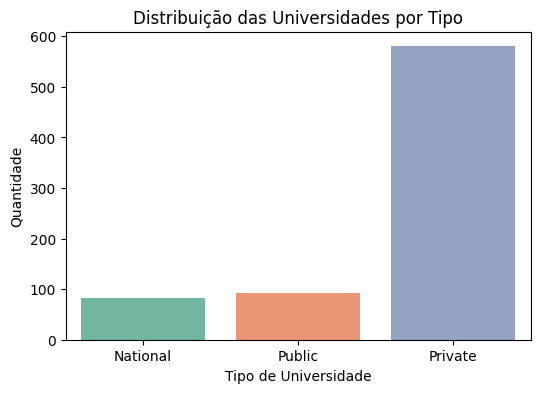

In [93]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, palette='Set2', hue='type', legend=False)
plt.title('Distribuição das Universidades por Tipo')
plt.xlabel('Tipo de Universidade')
plt.ylabel('Quantidade')
plt.show();

Distribuição das principais variáveis numéricas

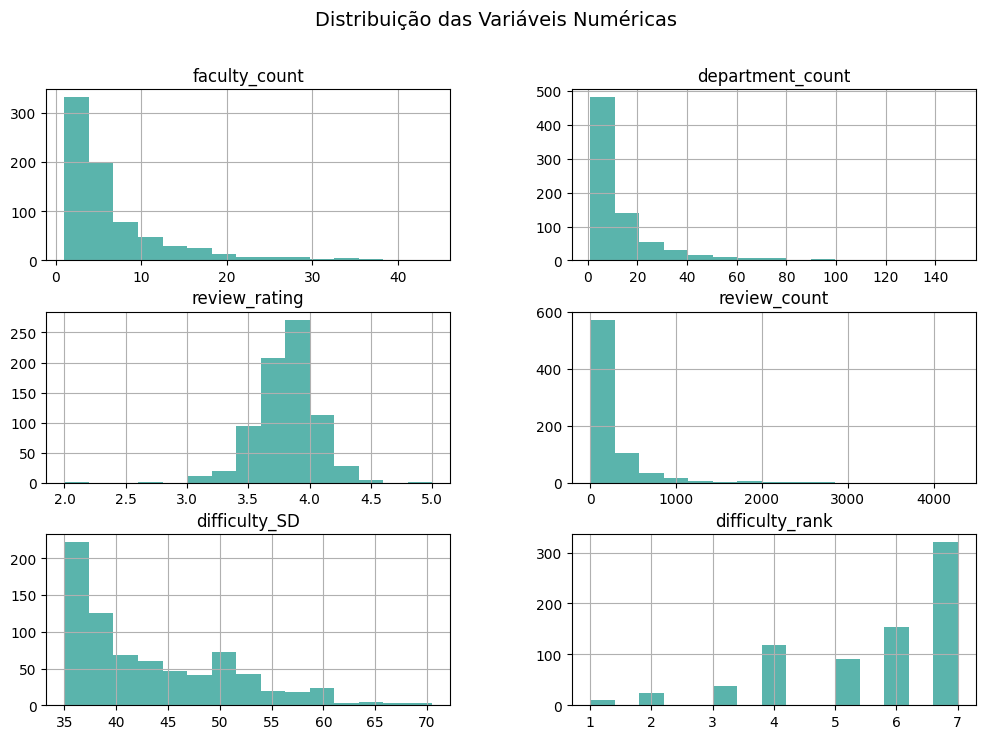

In [94]:
num_cols = ['faculty_count', 'department_count', 'review_rating', 'review_count', 'difficulty_SD', 'difficulty_rank']

df[num_cols].hist(figsize=(12,8), bins=15, color='#5ab4ac')
plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=14)
plt.show()

Boxplots por tipo de universidade

In [95]:
print("Valores únicos encontrados:")
print(df['difficulty_rank'].unique()[:50])

print("\nContagem dos principais valores:")
print(df['difficulty_rank'].value_counts().head(20))

# S = 7
# A = 6
# B = 5
# C = 4
# D = 3
# E = 2
# F = 1

Valores únicos encontrados:
[2 5 7 4 3 6 1]

Contagem dos principais valores:
difficulty_rank
7    320
6    153
4    118
5     91
3     38
2     24
1     10
Name: count, dtype: int64


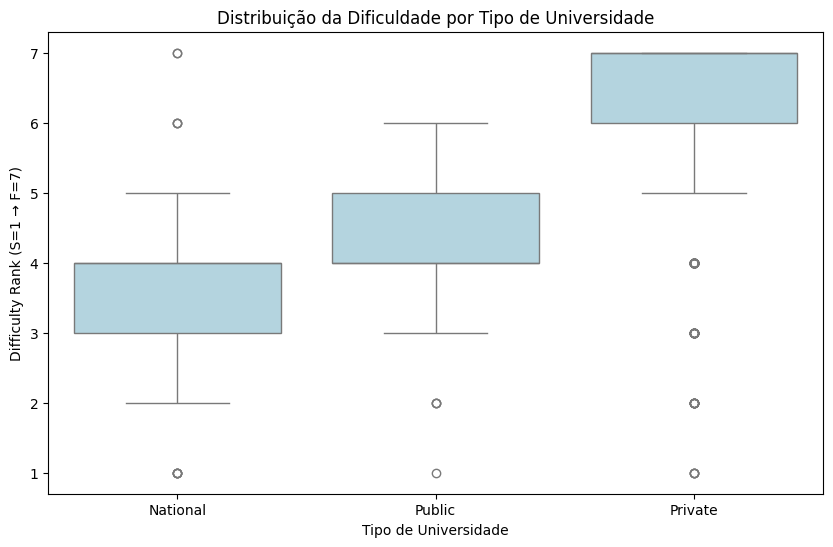

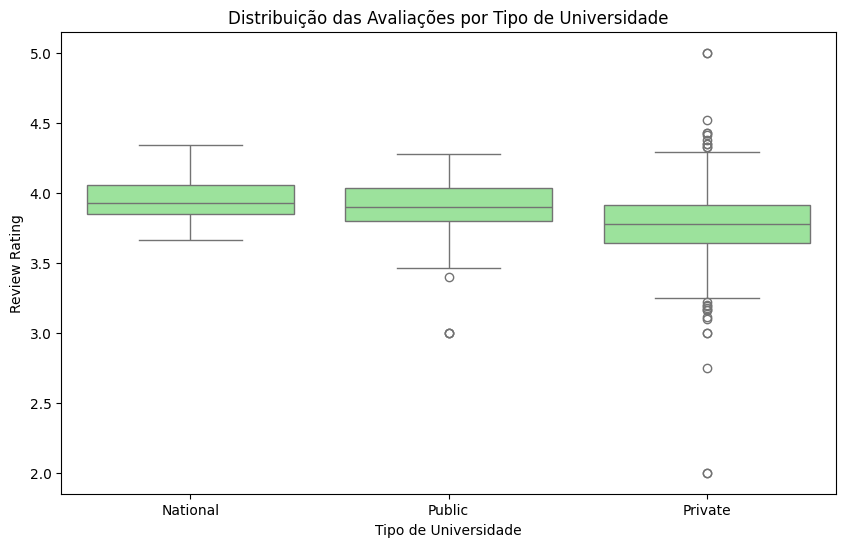

In [96]:
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='difficulty_rank', data=df, color='lightblue')
plt.title('Distribuição da Dificuldade por Tipo de Universidade')
plt.xlabel('Tipo de Universidade')
plt.ylabel('Difficulty Rank (S=1 → F=7)')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='review_rating', data=df, color='lightgreen')
plt.title('Distribuição das Avaliações por Tipo de Universidade')
plt.xlabel('Tipo de Universidade')
plt.ylabel('Review Rating')
plt.show()

Correlação entre variáveis numéricas

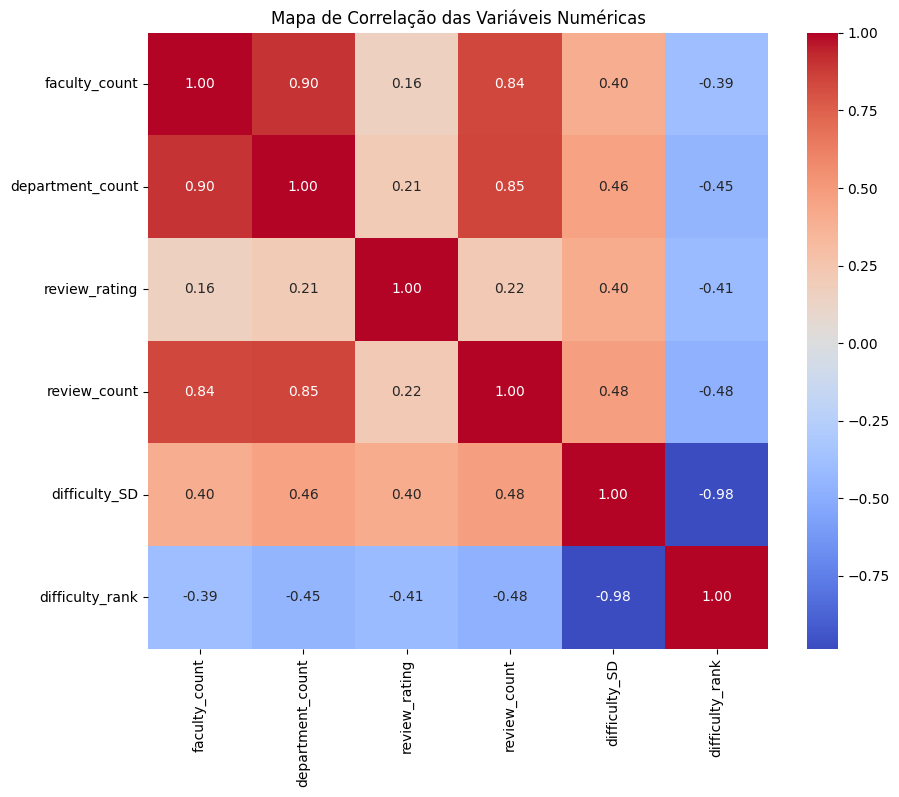

In [97]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação das Variáveis Numéricas')
plt.show()

Relação entre dificuldade e avaliação

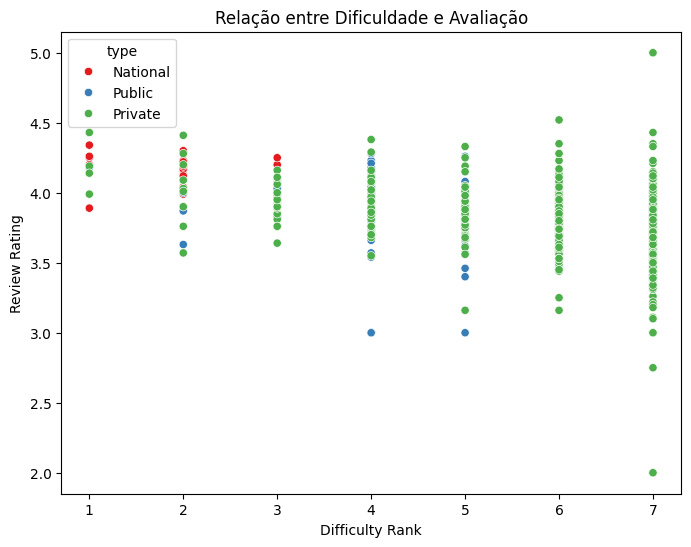

In [98]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='difficulty_rank', y='review_rating', hue='type', data=df, palette='Set1')
plt.title('Relação entre Dificuldade e Avaliação')
plt.xlabel('Difficulty Rank')
plt.ylabel('Review Rating')
plt.show()

## **Pré-processamento e Modelos de Classificação**

### **KNN**

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
print("Dimensões:", df.shape)
print("\nColunas:", df.columns.tolist())
print("\nValores únicos na coluna-alvo (type):", df['type'].unique())

Dimensões: (754, 13)

Colunas: ['Unnamed: 0', 'name', 'type', 'state', 'found', 'faculty_count', 'department_count', 'has_grad', 'has_remote', 'review_rating', 'review_count', 'difficulty_SD', 'difficulty_rank']

Valores únicos na coluna-alvo (type): ['National' 'Public' 'Private']


In [101]:
X = df.drop(columns=['type', 'name', 'state', 'found'])
y = df['type']

In [102]:
label_y = LabelEncoder()
y = label_y.fit_transform(y)

In [103]:
print(X.shape)
print(X.head())

(754, 9)
   Unnamed: 0  faculty_count  department_count  has_grad  has_remote  \
0           0             33                78      True       False   
1           1              3                 8      True       False   
2           2              3                10      True       False   
3           3              2                 6      True       False   
4           4              3                 5      True       False   

   review_rating  review_count  difficulty_SD  difficulty_rank  
0           4.16        1389.0           60.4                2  
1           3.79         544.0           47.1                5  
2           3.66         126.0           39.0                7  
3           3.80         257.0           50.0                4  
4           4.20          87.0           54.5                3  


In [104]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [106]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [107]:
y_pred = knn.predict(X_test)

In [108]:
acc = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo KNN: {acc:.4f}\n")

print("Relatório de classificação:")
print(classification_report(y_test, y_pred, target_names=label_y.classes_))


Acurácia do modelo KNN: 0.9404

Relatório de classificação:
              precision    recall  f1-score   support

    National       0.95      0.86      0.90        22
     Private       0.97      0.97      0.97       115
      Public       0.69      0.79      0.73        14

    accuracy                           0.94       151
   macro avg       0.87      0.87      0.87       151
weighted avg       0.94      0.94      0.94       151



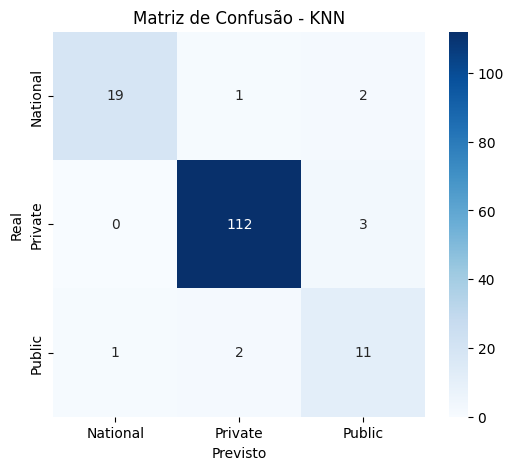

In [109]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d',
            xticklabels=label_y.classes_,
            yticklabels=label_y.classes_,
            cmap='Blues')
plt.title('Matriz de Confusão - KNN')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

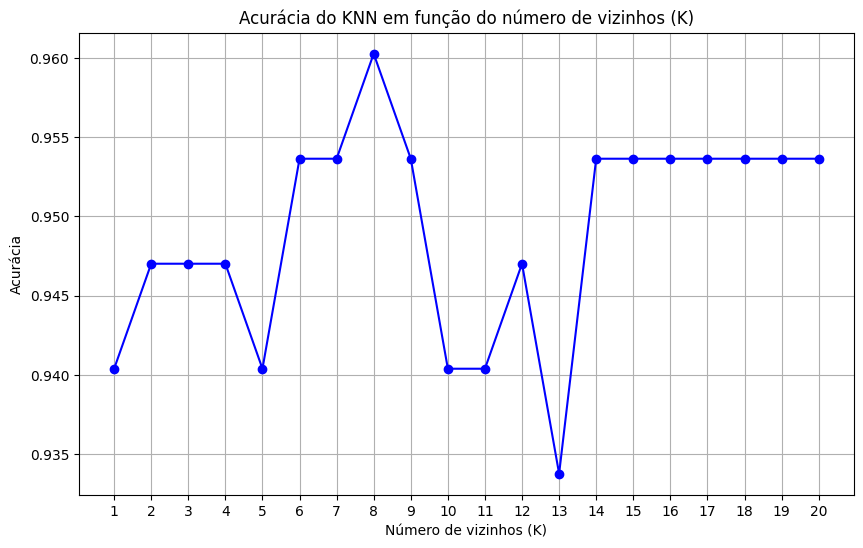

Melhor K encontrado: 8 (acurácia = 0.9603)


In [110]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Faixa de valores de K para testar
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Melhor valor de K
best_k = k_values[accuracies.index(max(accuracies))]
best_acc = max(accuracies)

# Plotar o gráfico
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Acurácia do KNN em função do número de vizinhos (K)')
plt.xlabel('Número de vizinhos (K)')
plt.ylabel('Acurácia')
plt.grid(True)
plt.xticks(k_values)
plt.show()

print(f"Melhor K encontrado: {best_k} (acurácia = {best_acc:.4f})")

### **NAIVE BAYES**

In [111]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
print("Dimensões:", df.shape)
print("Colunas:", df.columns.tolist())

Dimensões: (754, 13)
Colunas: ['Unnamed: 0', 'name', 'type', 'state', 'found', 'faculty_count', 'department_count', 'has_grad', 'has_remote', 'review_rating', 'review_count', 'difficulty_SD', 'difficulty_rank']


In [113]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [114]:
X = df.drop(columns=['type', 'name', 'state', 'found'])
y = df['type']

In [115]:
label_y = LabelEncoder()
y = label_y.fit_transform(y)

In [116]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [118]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [119]:
y_pred = nb.predict(X_test)

In [120]:
acc = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo Naive Bayes: {acc:.4f}\n")

print("Relatório de classificação:")
print(classification_report(y_test, y_pred, target_names=label_y.classes_))


Acurácia do modelo Naive Bayes: 0.9007

Relatório de classificação:
              precision    recall  f1-score   support

    National       0.81      1.00      0.90        22
     Private       1.00      0.91      0.95       115
      Public       0.47      0.64      0.55        14

    accuracy                           0.90       151
   macro avg       0.76      0.85      0.80       151
weighted avg       0.92      0.90      0.91       151



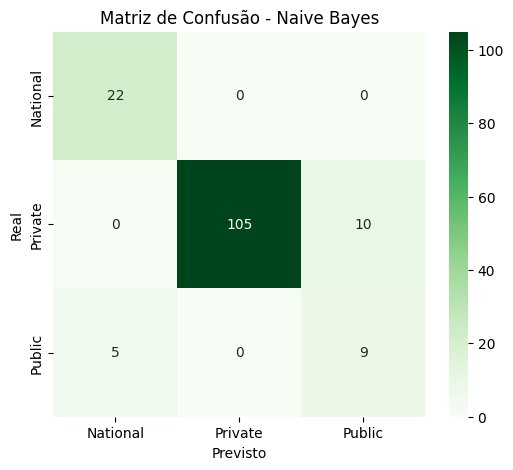

In [121]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d',
            xticklabels=label_y.classes_,
            yticklabels=label_y.classes_,
            cmap='Greens')
plt.title('Matriz de Confusão - Naive Bayes')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

### **ÁRVORE DE DECISÃO**

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
print("Dimensões:", df.shape)
print("Colunas:", df.columns.tolist())

Dimensões: (754, 13)
Colunas: ['Unnamed: 0', 'name', 'type', 'state', 'found', 'faculty_count', 'department_count', 'has_grad', 'has_remote', 'review_rating', 'review_count', 'difficulty_SD', 'difficulty_rank']


In [124]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [125]:
X = df.drop(columns=['type', 'name', 'state', 'found'])
y = df['type']

In [126]:
label_y = LabelEncoder()
y = label_y.fit_transform(y)

In [127]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [129]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [130]:
y_pred = dt.predict(X_test)

In [131]:
acc = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo Árvore de Decisão: {acc:.4f}\n")

print("Relatório de classificação:")
print(classification_report(y_test, y_pred, target_names=label_y.classes_))


Acurácia do modelo Árvore de Decisão: 0.9934

Relatório de classificação:
              precision    recall  f1-score   support

    National       1.00      1.00      1.00        22
     Private       1.00      0.99      1.00       115
      Public       0.93      1.00      0.97        14

    accuracy                           0.99       151
   macro avg       0.98      1.00      0.99       151
weighted avg       0.99      0.99      0.99       151



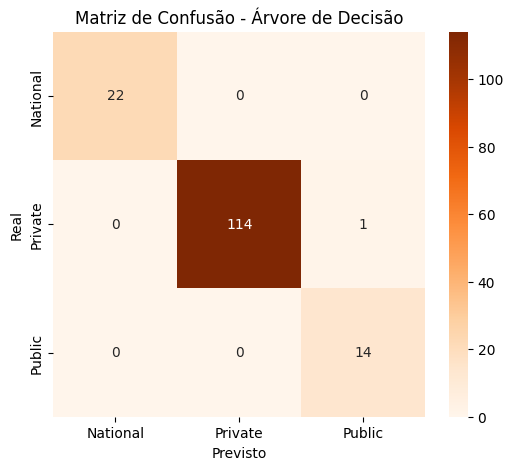

In [132]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d',
            xticklabels=label_y.classes_,
            yticklabels=label_y.classes_,
            cmap='Oranges')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

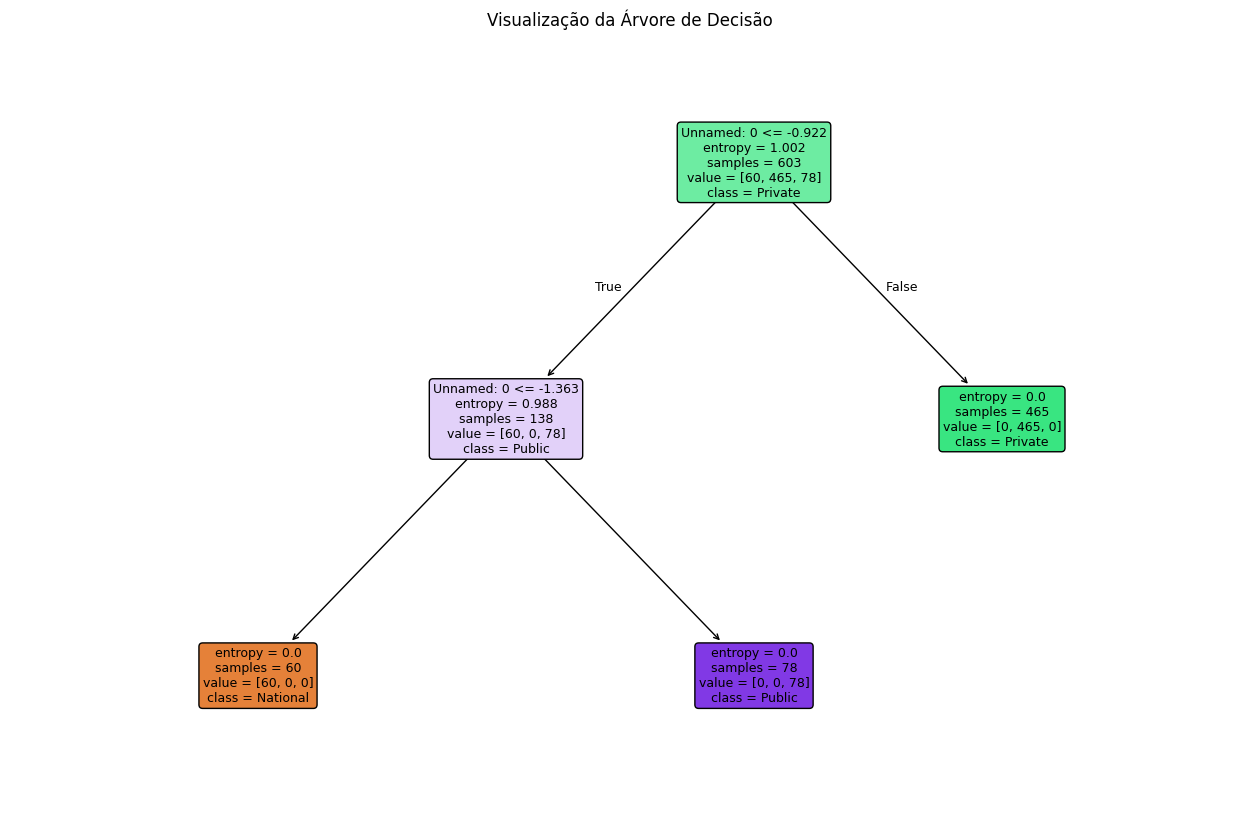

In [133]:
plt.figure(figsize=(16,10))
plot_tree(dt, feature_names=X.columns, class_names=label_y.classes_, filled=True, rounded=True, fontsize=9)
plt.title("Visualização da Árvore de Decisão")
plt.show()

### **REGRESSÃO LOGÍSTICA**

In [169]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [170]:
codif = LabelEncoder()
y_convertido = codif.fit_transform(y) # Convertendo os valores Strings em números (inteiros)

In [171]:
# Definindo parametros
num_features = X_train.shape[1]
num_classes = 3 # Números de classes que temos na nossa variável alvo "type"

In [172]:
model = Sequential()
 # Ativação Softmax para predição de variáveis multiclasses
model.add(Dense(units=num_classes, input_dim=num_features, activation='softmax'));

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [173]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [174]:
acuracia = accuracy_score(y_test, y_pred)

print(f"Acurácia: {acc}")

Acurácia: 0.994


**Relatório completo.**

In [175]:
rel_completo = classification_report(y_test, y_pred, target_names=label_y.classes_, output_dict=True)

rel_completo_df = pd.DataFrame(rel_completo).transpose()

print("Relatório de Classificação (apenas números):")
print(rel_completo_df)

Relatório de Classificação (apenas números):
              precision    recall  f1-score     support
National       1.000000  0.909091  0.952381   22.000000
Private        1.000000  1.000000  1.000000  115.000000
Public         0.875000  1.000000  0.933333   14.000000
accuracy       0.986755  0.986755  0.986755    0.986755
macro avg      0.958333  0.969697  0.961905  151.000000
weighted avg   0.988411  0.986755  0.986881  151.000000


**Matriz de Confusão.**

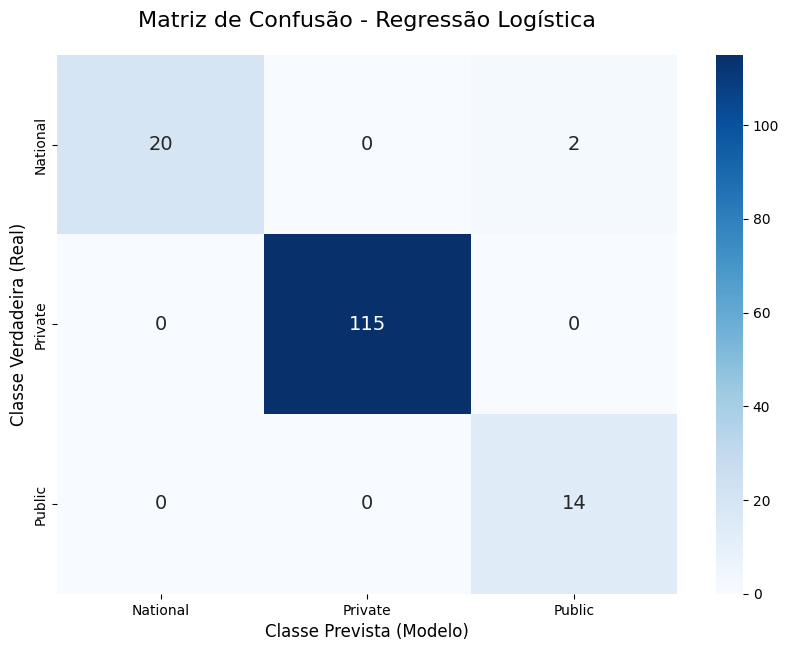

In [176]:
cm = confusion_matrix(y_test, y_pred)

class_names = label_y.classes_

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names,
            yticklabels=class_names, annot_kws={"size": 14})

plt.title('Matriz de Confusão - Regressão Logística', fontsize=16, pad=20)
plt.ylabel('Classe Verdadeira (Real)', fontsize=12)
plt.xlabel('Classe Prevista (Modelo)', fontsize=12)

plt.show()

### **REDES NEURAIS**

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [143]:
X = df.drop(columns=['type', 'name', 'state', 'found'])
y = df['type']

In [144]:
label_y = LabelEncoder()
y = label_y.fit_transform(y)

In [145]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [147]:
mlp = MLPClassifier(
    hidden_layer_sizes=(40, 70, 100, 70, 40, 25),
    activation='relu',
    solver='adam',
    max_iter=1500,
    random_state=42
)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(40, 70, 100, 70, 40, 25), max_iter=1500,
              random_state=42)

In [148]:
y_pred = mlp.predict(X_test)

In [149]:
acc = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo Rede Neural (MLPClassifier): {acc:.4f}\n")

print("Relatório de classificação:")
print(classification_report(y_test, y_pred, target_names=label_y.classes_))


Acurácia do modelo Rede Neural (MLPClassifier): 0.9868

Relatório de classificação:
              precision    recall  f1-score   support

    National       1.00      0.91      0.95        22
     Private       1.00      1.00      1.00       115
      Public       0.88      1.00      0.93        14

    accuracy                           0.99       151
   macro avg       0.96      0.97      0.96       151
weighted avg       0.99      0.99      0.99       151



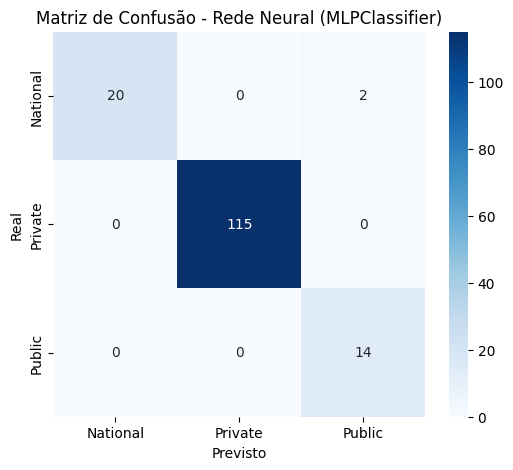

In [150]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d',
            cmap='Blues',
            xticklabels=label_y.classes_,
            yticklabels=label_y.classes_)
plt.title('Matriz de Confusão - Rede Neural (MLPClassifier)')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

In [151]:
n_input = X_train.shape[1]
n_hidden = mlp.hidden_layer_sizes
n_output = len(label_y.classes_)

print("Estrutura da Rede Neural")
print(f"Camada de entrada: {n_input} neurônios (features)")
for i, h in enumerate(n_hidden):
    print(f"Camada oculta {i+1}: {h} neurônios")
print(f"Camada de saída: {n_output} neurônios (classes: {label_y.classes_.tolist()})")

Estrutura da Rede Neural
Camada de entrada: 9 neurônios (features)
Camada oculta 1: 40 neurônios
Camada oculta 2: 70 neurônios
Camada oculta 3: 100 neurônios
Camada oculta 4: 70 neurônios
Camada oculta 5: 40 neurônios
Camada oculta 6: 25 neurônios
Camada de saída: 3 neurônios (classes: ['National', 'Private', 'Public'])


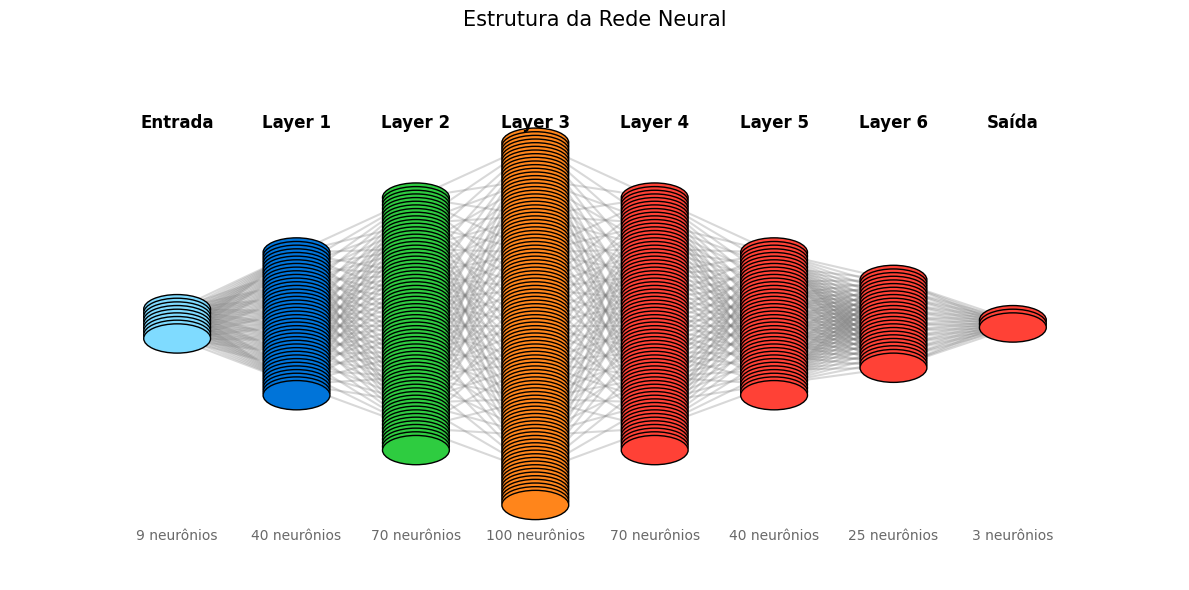

In [152]:
import matplotlib.pyplot as plt

def plot_rede_neural_aprimorada(layer_sizes, layer_labels=None):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.axis('off')

    n_layers = len(layer_sizes)
    v_spacing = 1.0 / float(max(layer_sizes))
    h_spacing = 1.0 / float(len(layer_sizes) - 1)

    colors = ['#7FDBFF', '#0074D9', '#2ECC40', '#FF851B', '#FF4136']  # degradê suave
    layer_labels = layer_labels or ["Entrada"] + [f"Oculta {i+1}" for i in range(n_layers-2)] + ["Saída"]

    # Plotar nós
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2.0 + 0.5
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing, layer_top - m * v_spacing),
                                0.04, color=colors[min(n, len(colors)-1)], ec='black', zorder=3)
            ax.add_artist(circle)

        # Nome da camada (acima)
        plt.text(n * h_spacing, 1.05, layer_labels[n],
                 ha='center', va='center', fontsize=12, fontweight='bold')
        # Quantidade de neurônios (abaixo)
        plt.text(n * h_spacing, -0.08, f"{layer_size} neurônios",
                 ha='center', va='center', fontsize=10, color='dimgray')

    # Conexões simplificadas
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2.0 + 0.5
        layer_top_b = v_spacing * (layer_size_b - 1) / 2.0 + 0.5
        for m in range(0, layer_size_a, max(1, layer_size_a // 10)):
            for o in range(0, layer_size_b, max(1, layer_size_b // 10)):
                line = plt.Line2D([n * h_spacing, (n + 1) * h_spacing],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing],
                                  c='gray', alpha=0.3)
                ax.add_artist(line)

    plt.title("Estrutura da Rede Neural", fontsize=15, pad=30)

    # Ajustes de espaçamento e limites
    plt.xlim(-0.2, (n_layers - 1) * h_spacing + 0.2)
    plt.ylim(-0.2, 1.2)
    plt.tight_layout()
    plt.show()

# Exibir estrutura da rede
layer_sizes = [X_train.shape[1]] + list(mlp.hidden_layer_sizes) + [len(label_y.classes_)]
layer_labels = ["Entrada"] + [f"Layer {i+1}" for i in range(len(mlp.hidden_layer_sizes))] + ["Saída"]
plot_rede_neural_aprimorada(layer_sizes, layer_labels)


## **Resultados Finais**

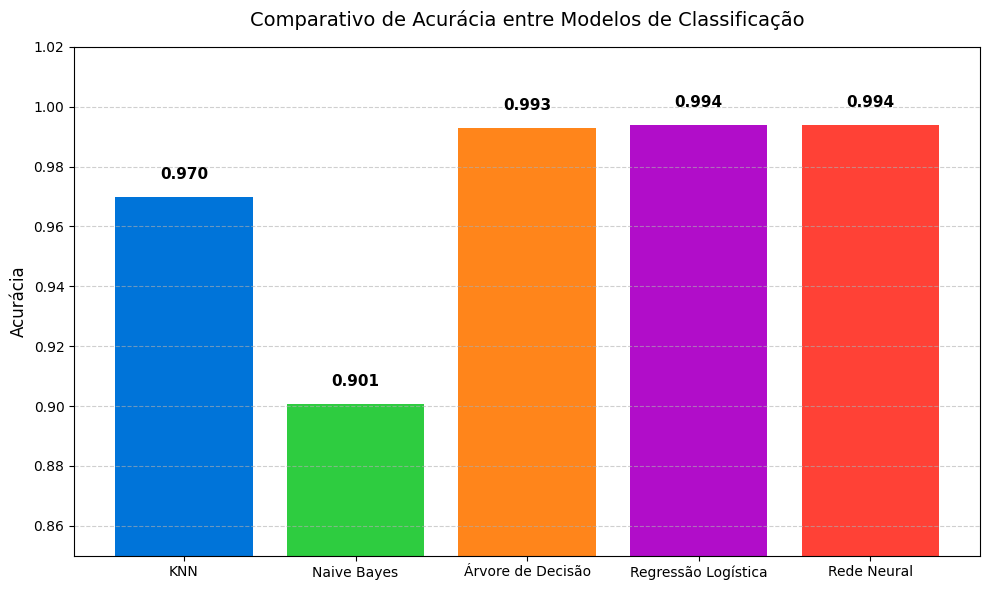

In [178]:
import matplotlib.pyplot as plt

modelos = ['KNN', 'Naive Bayes', 'Árvore de Decisão', 'Regressão Logística', 'Rede Neural']
acuracias = [0.97, 0.9007, 0.993, 0.994, 0.994]

plt.figure(figsize=(10,6))
barras = plt.bar(modelos, acuracias, color=['#0074D9','#2ECC40','#FF851B','#B10DC9','#FF4136'])

for barra, acc in zip(barras, acuracias):
    plt.text(barra.get_x() + barra.get_width()/2,
             acc + 0.005,
             f"{acc:.3f}",
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

plt.title('Comparativo de Acurácia entre Modelos de Classificação', fontsize=14, pad=15)
plt.ylabel('Acurácia', fontsize=12)
plt.ylim(0.85, 1.02)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
